# ANÁLISE DE DADOS DA COVID REFERENTE AO BRASIL

# ÚLTIMA ATUALIZAÇÃO DOS DADOS : 10/03/2023

IMPORTAÇÃO DE BIBLIOTECAS

In [48]:
from urllib.request import urlopen
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math as mt

FAZENDO REQUISIÇÃO NA API

In [49]:
response = urlopen("https://coronavirus.m.pipedream.net/").read()
dados = json.loads(response)
dados_covid = dados['rawData']

CRIANDO FUNÇÃO QUE FILTRA OS DADOS DO BRASIL

In [50]:
# dados_brasil = []
# for dados in dados_covid:
#     if  dados['Country_Region'] == 'Brazil':
#         dados_brasil.append(dados)
# print(dados_brasil)        
def filtra_dados(dados):
    if dados['Country_Region'] == 'Brazil':
        return True
    else:
        return False

dados_brasil = list(filter(filtra_dados,dados_covid))
print(dados_brasil)

[{'FIPS': '', 'Admin2': '', 'Province_State': 'Acre', 'Country_Region': 'Brazil', 'Last_Update': '2023-03-10 04:21:03', 'Lat': '-9.0238', 'Long_': '-70.812', 'Confirmed': '160433', 'Deaths': '2043', 'Recovered': '', 'Active': '', 'Combined_Key': 'Acre, Brazil', 'Incident_Rate': '18191.02314796442', 'Case_Fatality_Ratio': '1.2734287833550455'}, {'FIPS': '', 'Admin2': '', 'Province_State': 'Alagoas', 'Country_Region': 'Brazil', 'Last_Update': '2023-03-10 04:21:03', 'Lat': '-9.5713', 'Long_': '-36.782', 'Confirmed': '337535', 'Deaths': '7242', 'Recovered': '', 'Active': '', 'Combined_Key': 'Alagoas, Brazil', 'Incident_Rate': '10113.841581826577', 'Case_Fatality_Ratio': '2.1455552757491816'}, {'FIPS': '', 'Admin2': '', 'Province_State': 'Amapa', 'Country_Region': 'Brazil', 'Last_Update': '2023-03-10 04:21:03', 'Lat': '0.902', 'Long_': '-52.003', 'Confirmed': '185668', 'Deaths': '2167', 'Recovered': '', 'Active': '', 'Combined_Key': 'Amapa, Brazil', 'Incident_Rate': '21953.552607152866', 'C

FILTRANDO OS DADOS COM OS VALORES para os gráficos

In [51]:
dadosgrafico={}

for dados in dados_brasil:
    dadosgrafico[dados['Province_State']] = {
        'Confirmados':dados['Confirmed'],
        'Mortes':dados['Deaths']
    }
print(dadosgrafico)

{'Acre': {'Confirmados': '160433', 'Mortes': '2043'}, 'Alagoas': {'Confirmados': '337535', 'Mortes': '7242'}, 'Amapa': {'Confirmados': '185668', 'Mortes': '2167'}, 'Amazonas': {'Confirmados': '631976', 'Mortes': '14443'}, 'Bahia': {'Confirmados': '1792572', 'Mortes': '31459'}, 'Ceara': {'Confirmados': '1453572', 'Mortes': '28157'}, 'Distrito Federal': {'Confirmados': '897897', 'Mortes': '11844'}, 'Espirito Santo': {'Confirmados': '1323318', 'Mortes': '15041'}, 'Goias': {'Confirmados': '1898605', 'Mortes': '28036'}, 'Maranhao': {'Confirmados': '493391', 'Mortes': '11053'}, 'Mato Grosso': {'Confirmados': '878360', 'Mortes': '15087'}, 'Mato Grosso do Sul': {'Confirmados': '607356', 'Mortes': '11010'}, 'Minas Gerais': {'Confirmados': '4189760', 'Mortes': '65507'}, 'Para': {'Confirmados': '871612', 'Mortes': '19021'}, 'Paraiba': {'Confirmados': '707743', 'Mortes': '10542'}, 'Parana': {'Confirmados': '2918459', 'Mortes': '46018'}, 'Pernambuco': {'Confirmados': '1156640', 'Mortes': '22686'}, 

SALVANDO EM UM CSV

In [52]:
cabecalho = ('Estado','Confirmados','Mortes')
with open("covid.csv","w") as arquivo:
    writer = csv.writer(arquivo)
    writer.writerow(cabecalho)
    for chave in dadosgrafico:
        writer.writerow((chave,dadosgrafico[chave]['Confirmados'],dadosgrafico[chave]['Mortes']))

USANDO O PANDAS PARA PERCORRER O CSV

In [53]:
df = pd.read_csv('covid.csv')
print(df)


                 Estado  Confirmados  Mortes
0                  Acre       160433    2043
1               Alagoas       337535    7242
2                 Amapa       185668    2167
3              Amazonas       631976   14443
4                 Bahia      1792572   31459
5                 Ceara      1453572   28157
6      Distrito Federal       897897   11844
7        Espirito Santo      1323318   15041
8                 Goias      1898605   28036
9              Maranhao       493391   11053
10          Mato Grosso       878360   15087
11   Mato Grosso do Sul       607356   11010
12         Minas Gerais      4189760   65507
13                 Para       871612   19021
14              Paraiba       707743   10542
15               Parana      2918459   46018
16           Pernambuco      1156640   22686
17                Piaui       424866    8354
18  Rio Grande do Norte       585935    8715
19    Rio Grande do Sul      2961756   41919
20       Rio de Janeiro      2752662   76844
21        

CRIANDO LISTAS PARA SEREM PLOTADOS NO GRÁFICO DE BARRAS

In [54]:
grafico_estados     = []
grafico_mortes      = []
grafico_confirmados = []

for chave in dadosgrafico:
    grafico_estados.append(chave)
    grafico_mortes.append(int(dadosgrafico[chave]['Mortes']))
    grafico_confirmados.append(int(dadosgrafico[chave]['Confirmados']))

PLOTANDO EM UM GRAFICO DE BARRAS O NÚMERO DE CASOS CONFIRMADOS

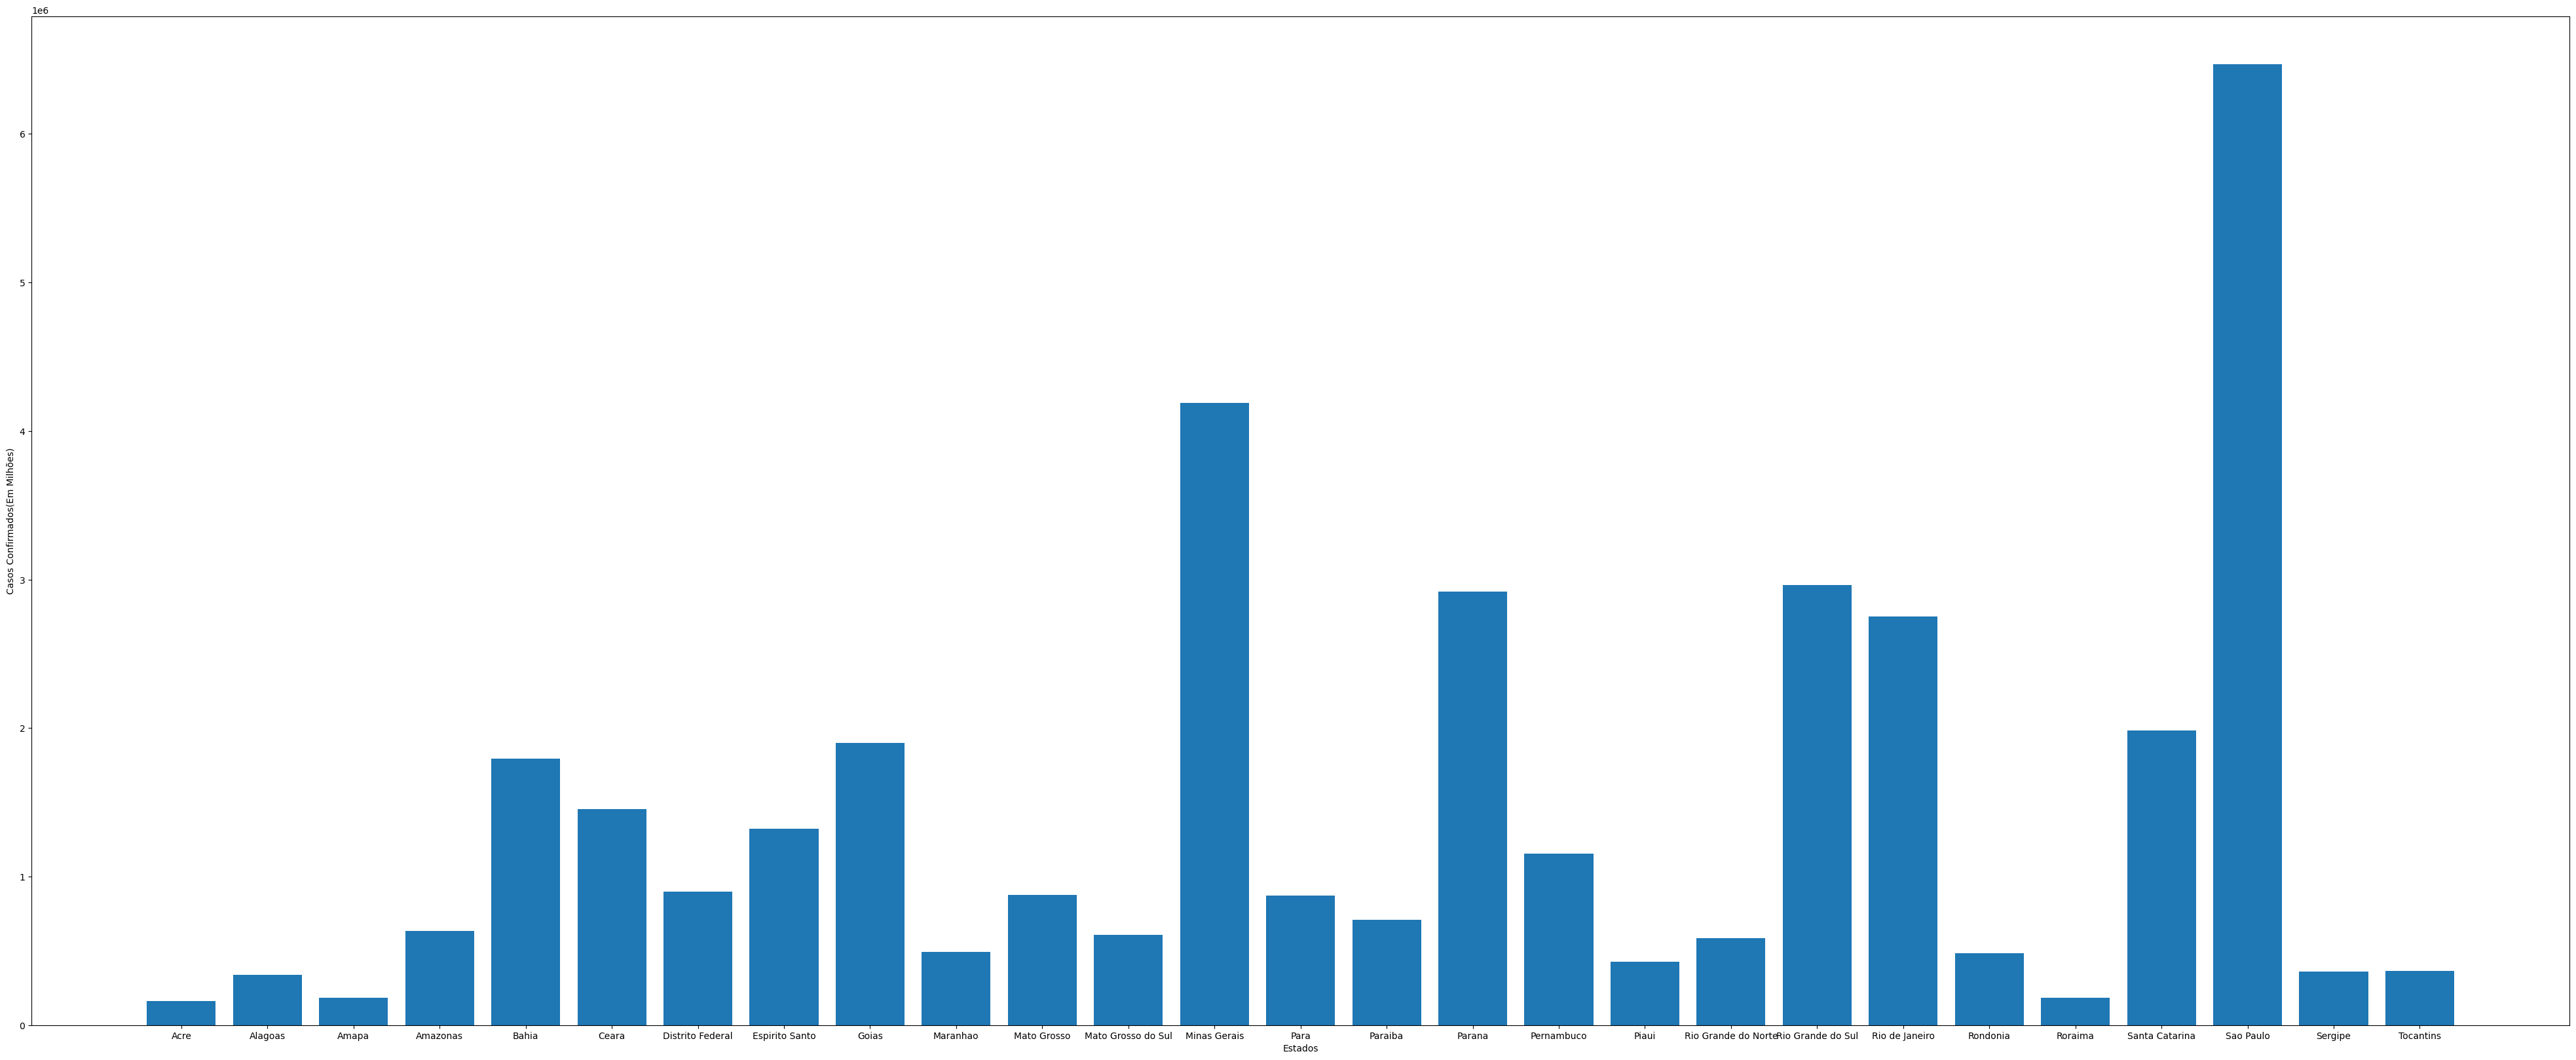

In [55]:
plt.figure(figsize=(50, 20))
plt.bar(grafico_estados,grafico_confirmados)
plt.ylabel('Casos Confirmados(Em Milhões)')
plt.xlabel('Estados')
plt.show()

PLOTANDO O GRÁFICO DE BARRAS COM O NÚMERO DE ÓBITOS

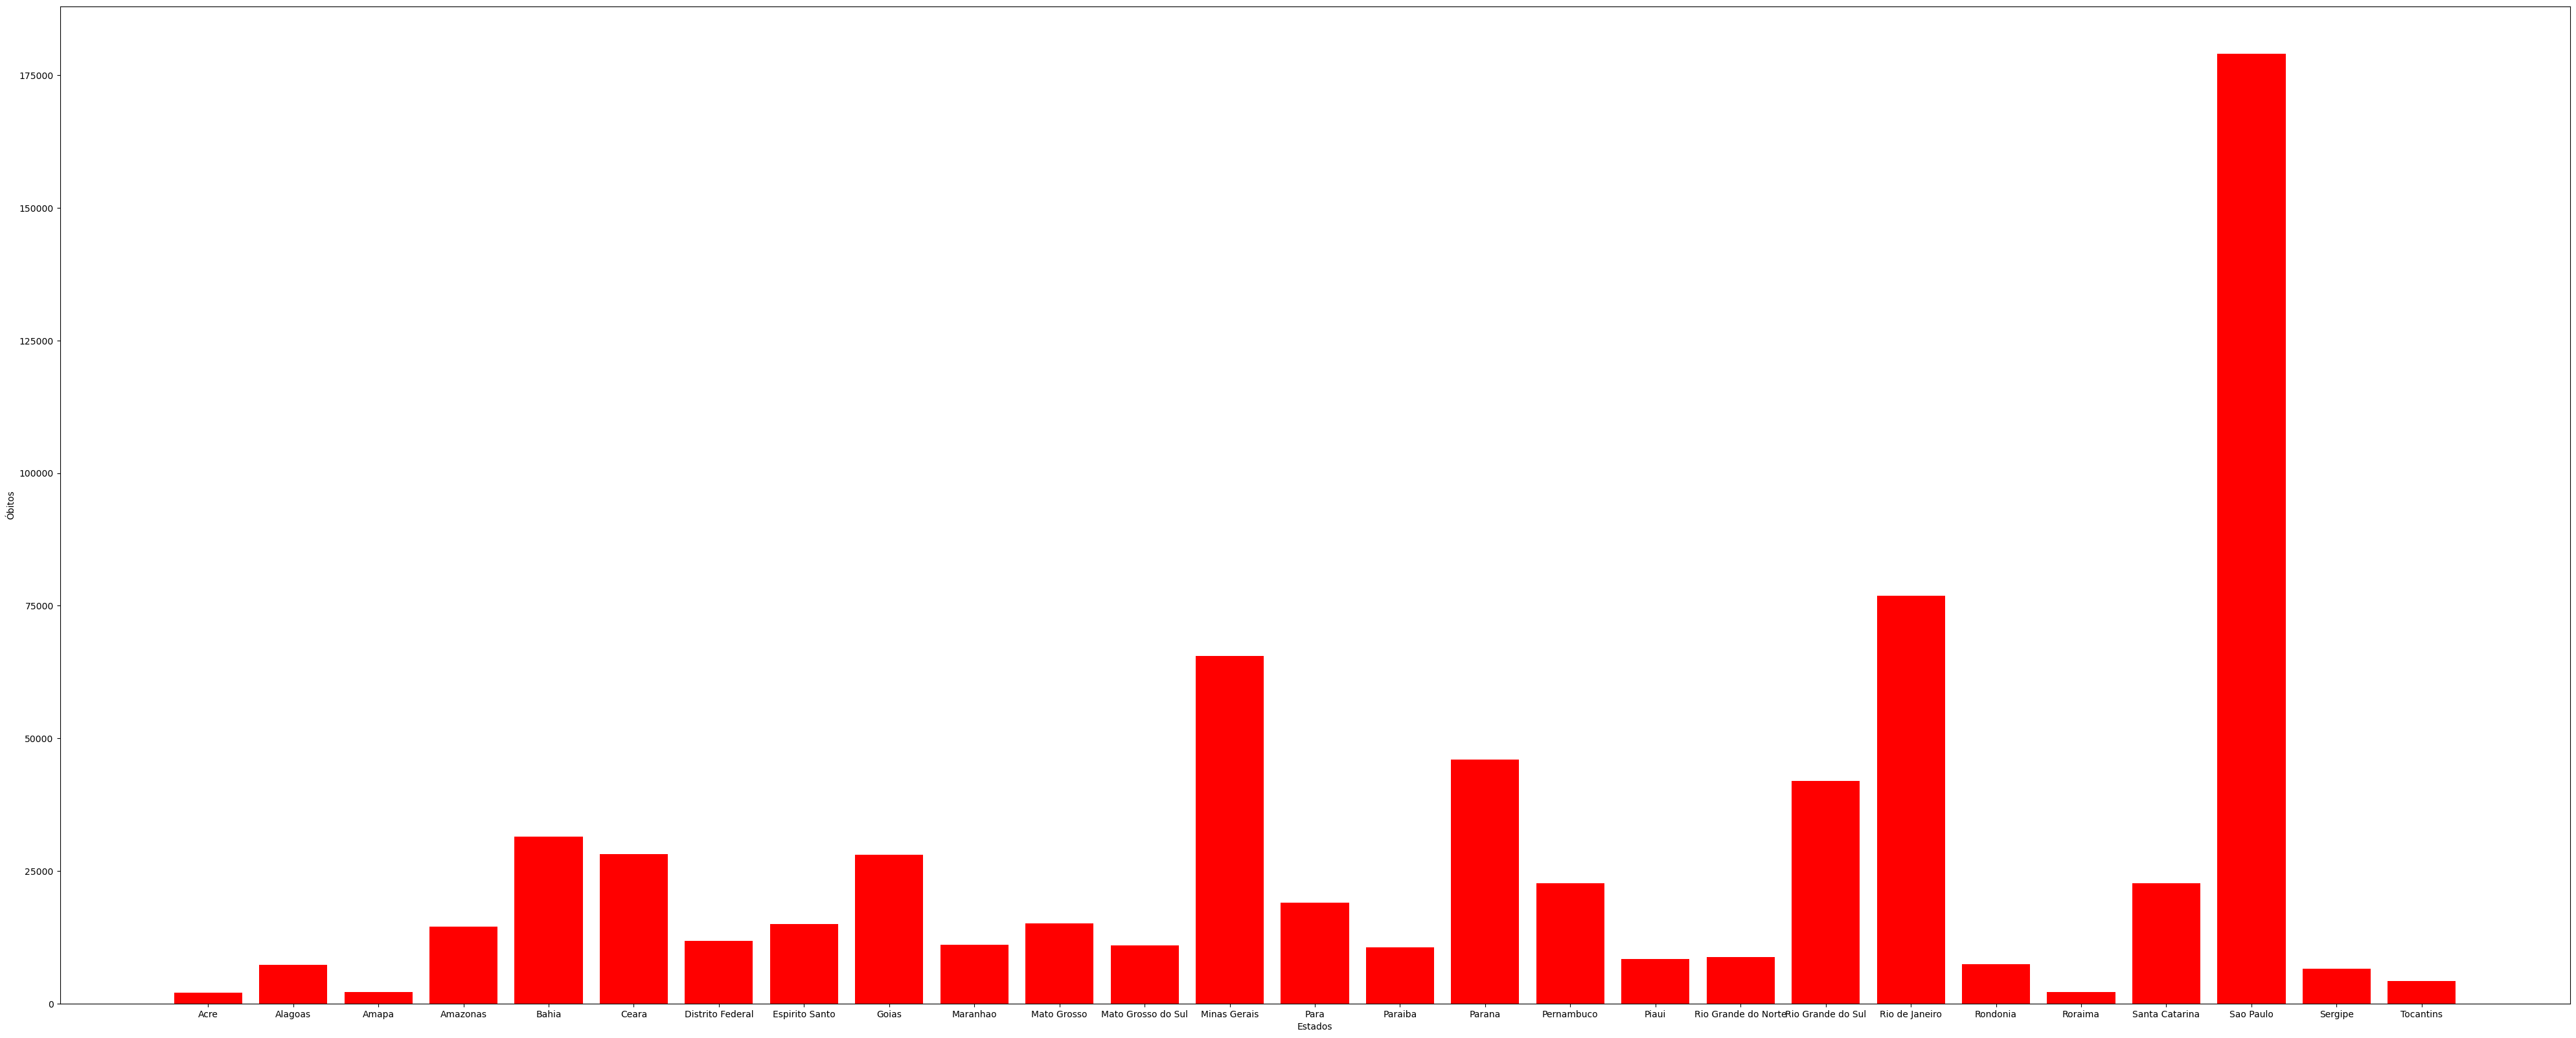

In [56]:
plt.figure(figsize=(50, 20))
plt.bar(grafico_estados,grafico_mortes, color = "Red")
plt.ylabel('Óbitos')
plt.xlabel('Estados')
plt.show()